## <span style="color:brown"> Laboratorio di Simulazione Numerica - Esercitazione 11 </span>

### Esercizio 11.1

Per fare pratica con le **reti neurali** in questo esercizio ho studiato come la regressione lineare presentata nel notebook *LSN_Exercises_11LSN_Exercises_11regressione* dipende dal numero di epoche $N_{epochs}$, dal numero di dati di training $N_{train}$ e dal rumore $\sigma$. Ho provato a migliorare i risultati operando su questi parametri.

Facendo alcune prove, probabilmente a causa della semplicità del modello, mi sono reso conto che non è necessario aumentare i punti di training. Per questo motivo ho tenuto $N_{train}=500$ per ogni simulazione (alla fine ci saranno alcuni commenti sull'opportunità di ridurre il numero di dati di training). Per quanto riguarda i dati di test invece, ne genero sempre in quantità $\frac{1}{10}N_{train}$. Vado quindi a generare dati con rumori via via maggiori e ad analizzare la velocità di apprendimento della rete.

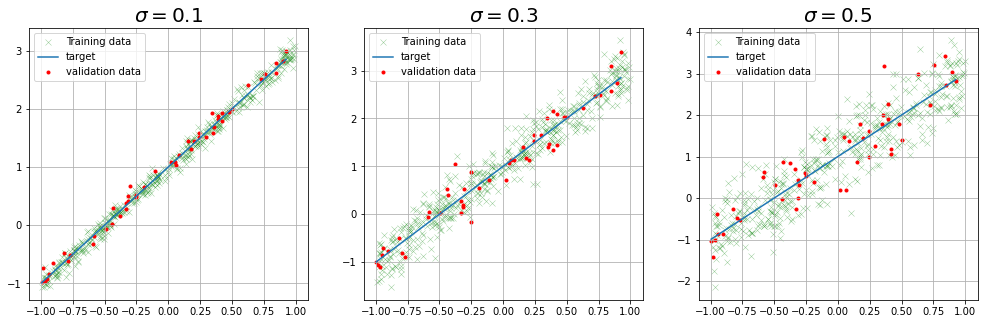

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

m = 2 # slope
b = 1 # intersect
y_target = m * x_valid + b # ideal (target) linear function

sigma = [0.1, 0.3, 0.5] # noise standard deviation
sigmas= ["0.1", "0.3", "0.5"]

y_train = np.zeros((3, len(x_train)))  # Define y_train as a matrix
y_valid = np.zeros((3, len(x_valid)))  # Define y_valid as a matrix

plt.figure(figsize=(17,5))
for i in range (3):
    plt.subplot(1,3,i+1)
    y_train[i] = np.random.normal(m * x_train + b, sigma[i]) # actual measures from which we want to guess regression parameters
    y_valid[i] = np.random.normal(m * x_valid + b, sigma[i])
    plt.scatter(x_train, y_train[i], marker = "x", color='green', label='Training data',linewidth=0.5, alpha=0.4)
    plt.plot(x_valid, y_target, label='target')
    plt.scatter(x_valid, y_valid[i], color='r', label='validation data', marker=".")
    plt.title("$\sigma=$"+sigmas[i], fontsize=20)
    plt.legend()
    plt.grid(True)
      
plt.show()

Definisco quindi la rete neurale con un solo strato ad un solo neurone.

2024-07-19 09:52:32.882151: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 09:52:32.888837: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 09:52:32.973544: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 09:52:34.456503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/andrea/an

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0113 - mse: 0.0111
Test loss: 0.011705033481121063
Test accuracy: 0.011373622342944145
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mse: 0.0705 
Test loss: 0.07092824578285217
Test accuracy: 0.07071935385465622
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2373 - mse: 0.2226 
Test loss: 0.263522207736969
Test accuracy: 0.24148990213871002


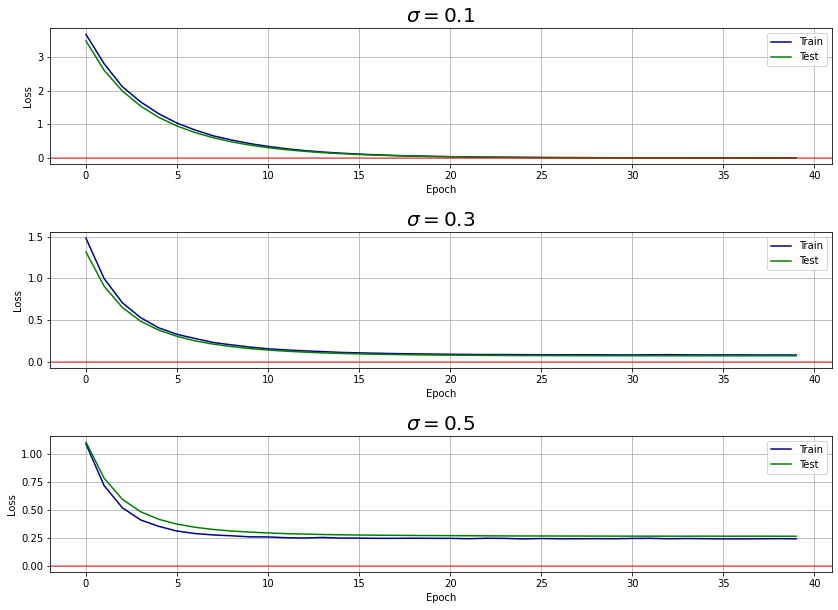

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

Nepochs = 40
models = []  # List to store the models

for i in range(3):
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss, and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # create history
    history = model.fit(
        x=x_train,
        y=y_train[i],
        batch_size=32,
        epochs=Nepochs,
        shuffle=True,
        validation_data=(x_valid, y_valid[i]),
        verbose=0
    )
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid[i], batch_size=32, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    models.append(model)  # Save the model in the list

    plt.subplot(3, 1, i + 1)
    plt.plot(history.history['loss'], color="darkblue")
    plt.plot(history.history['val_loss'], color="green")
    plt.axhline(0, color='red', alpha=0.6)
    plt.title("$\sigma=$" + sigmas[i], fontsize=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')

    plt.grid(True)
    
plt.subplots_adjust(hspace=0.5)  
plt.show()

E' possibile notare che in tutti e tre i casi la velocità di convergenza è piuttosto simile, mentre man mano che si aumenta il rumore ovviamente tende ad aumentare il costo complessivo tra i parametri migliori. Anche se non ci sono grafici dedicati, si può notare che diminuendo il numero di dati di training sono necessarie più epoche per far convergere la rete neurale verso i parametri che minimizzano la funzione di costo.

Mostro ora le predizioni fatte dalle rete neurale così allenata:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


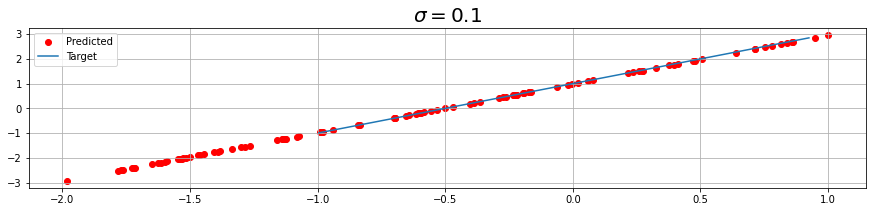

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


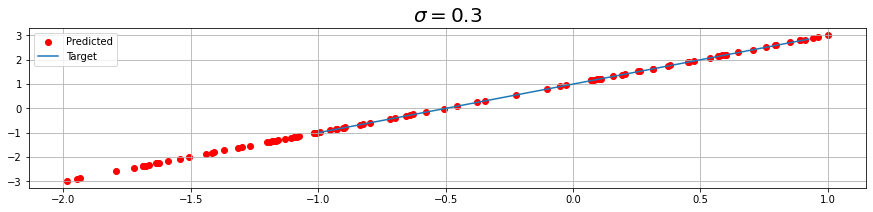

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x74b3344d04c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


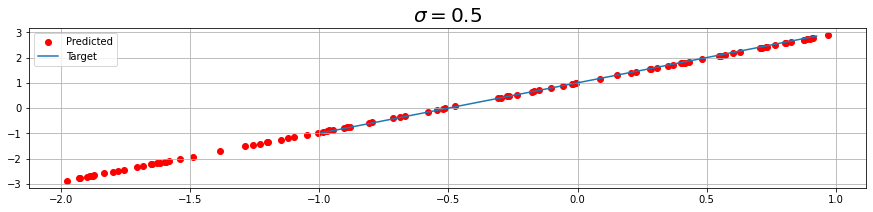

In [3]:
for i in range(3):
    plt.figure(figsize=(15, 10))    
    plt.subplot(3, 1, i + 1)
    x_predicted = np.random.uniform(-2, 1, 100)
    y_predicted = models[i].predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color='r', label='Predicted')
    plt.plot(x_valid, y_target, label='Target')
    plt.title("$\sigma=$" + sigmas[i], fontsize=20)
    plt.legend()
    plt.grid(True)
    plt.show()

E' possibile notare che in tutti i casi, anche per $\sigma = 0.5$, la rete neurale approssima molto bene la curva iniziale. Questo è dovuto fondamentalmente al fatto che la scelta dell'architettura della NN, dovuta ad una conoscenza pregressa del modello, ha vincolato l'output ad essere lineare. Da notare anche che per questo motivo la rete predice molto bene anche al di fuori del dominio su cui è stata allenata.

### Esercizio 11.2

In questo esercizio provo ad estendere il mio modello per ottenere un fit ragionevole del seguente polinomio di ordine $3$:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

In questo caso la funzione da fittare non è lineare, quindi non basta un solo neurone in un solo strato. In base all'esercizio precedente ho scelto di fissare $\sigma = 0.2$. Mostro ora i dati di training e di test e poi i risultati ottenuti con diverse architetture della rete neurale.

In [4]:
def f(x):
    return a + b*x + c*x**2 + d*x**3

# parameters of f(x) = a+bx+cx^2+dx^3
a = 4 
b = -3 
c = -2
d = 3

# generate training inputs
Ntrain=3000
sigma=0.2

np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 300)
x_valid.sort()
y_target = f(x_valid) # ideal (target) polynomial

y_train = np.zeros((3, len(x_train)))  # Define y_train as a matrix
y_valid = np.zeros((3, len(x_valid)))  # Define y_valid as a matrix

for i in range (3):
    y_train[i] = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
    y_valid[i] = np.random.normal(f(x_valid), sigma)

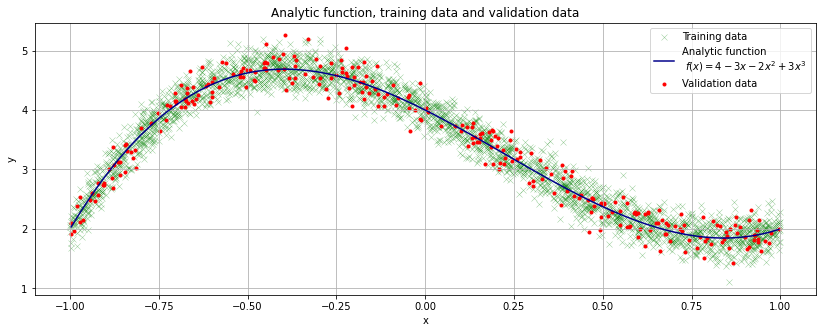

In [5]:
plt.figure(figsize=(14,5))
plt.scatter(x_train, y_train[0], marker = "x", color='green', label='Training data',linewidth=0.5, alpha=0.4)
plt.plot(x_valid, y_target, label = "Analytic function\n $f(x) = 4 - 3x - 2x^2 + 3x^3$", color="darkblue")
plt.scatter(x_valid, y_valid[0], marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Analytic function, training data and validation data")
plt.grid()
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0656 - mse: 0.0650 
Test loss: 0.06952185183763504
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0501 - mse: 0.0501 
Test loss: 0.04852994158864021
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0487 - mse: 0.0490 
Test loss: 0.04224122688174248


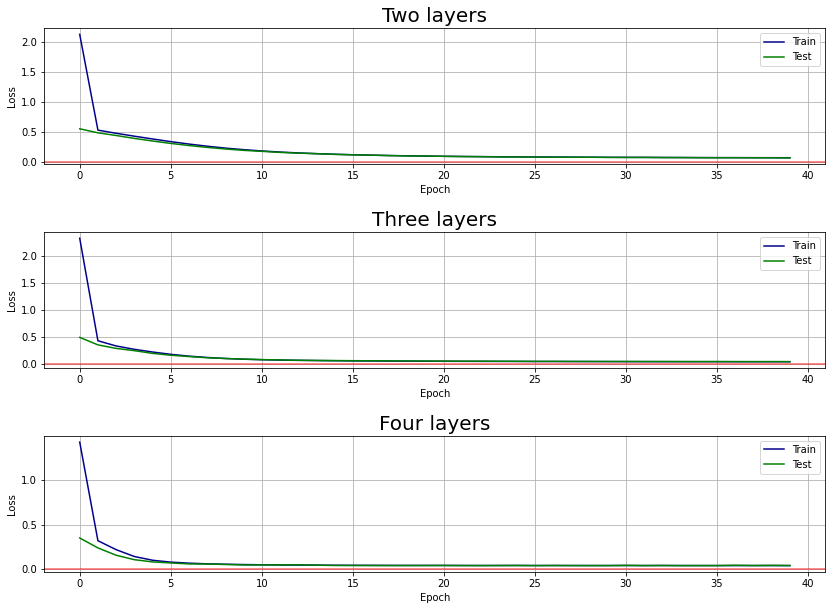

In [6]:
plt.figure(figsize=(14, 10))

Nepochs = 40
models = []  # List to store the models
layers = ["Two", "Three", "Four"]

for i in range(3):
    model = Sequential()
    
    act = 'relu'
    model.add(Dense(20, input_shape=(1,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
    if (i>0):
        model.add(Dense(30, activation = act))
    if (i>1):
        model.add(Dense(30, activation = act))
    model.add(Dense(1, activation = 'relu'))

    # compile the model choosing optimizer, loss, and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # create history
    history = model.fit(
        x=x_train,
        y=y_train[i],
        batch_size=32,
        epochs=Nepochs,
        shuffle=True,
        validation_data=(x_valid, y_valid[i]),
        verbose=0
    )
    
    # evaluate model
    score = model.evaluate(x_valid, y_valid[i], batch_size=32, verbose=1)
    print('Test loss:', score[0])
    
    models.append(model)  # Save the model in the list

    plt.subplot(3, 1, i + 1)
    plt.plot(history.history['loss'], color="darkblue")
    plt.plot(history.history['val_loss'], color="green")
    plt.axhline(0, color='red', alpha=0.6)
    plt.title(layers[i]+" layers", fontsize=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')

    plt.grid(True)
    
plt.subplots_adjust(hspace=0.5)  
plt.show()

E' possibile notare che il risultato migliore si ottiene con quattro layers. Diminuendo i layers aumenta il tempo di convergenza, mentre mettendone quattro il tempo di convergenza sembra leggermente minore di quello che si ha con meno livelli.

Al contrario ho provato a tenere due soli livelli aumentando il numero di neuroni nel primo. La procedura non ha provocato un sostanziale miglioramento, che è invece raggiunto aumentando la profondità della rete. Per quanto riguarda i metodi di ottimizzazione non ho notato particolari vantaggi nell'uso di uno o dell'altro, mentre per quanto riguarda le funzioni di attivazione la *relu* e la *elu* risultavano essere più prestanti.

Di seguito la previsione fatta dal modello a quattro strati:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


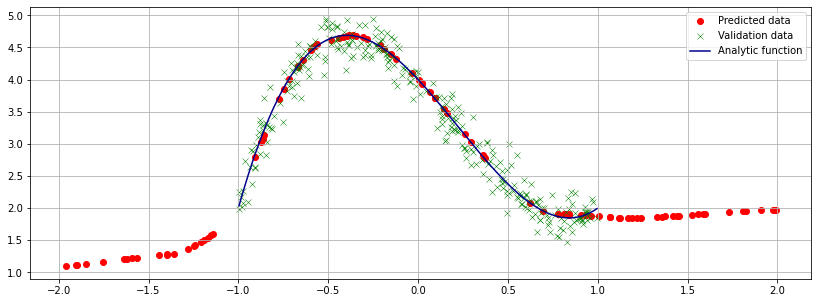

In [8]:
plt.figure(figsize=(14,5))

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = models[2].predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted data')
plt.scatter(x_valid, y_valid[2], marker = "x", color='green', label='Validation data', linewidth=0.5)
plt.plot(x_valid, f(x_valid), label='Analytic function', color="darkblue")
plt.legend()
plt.grid(True)
plt.show()

E' possibile osservare che in questo caso, a differenza della funzione lineare, con questi metodi non c'è alcuna speranza di modellizzare la funzione al di fuori del dominio in cui la rete è stata allenata.

### Esercizio 11.3

In questo esercizio provo ad estendere ulteriormente il mio modello per fittare una semplice funzione trigonometrica 2D come $f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [9]:
from mpl_toolkits import mplot3d

def f(x,y):
    return np.sin(x**2+y**2)


# generate training inputs
Ntrain=10000
Nvalidation = int(Ntrain/10)
sigma=0.2

np.random.seed(0)
span=3/2

x_train = np.random.uniform(-span, span, Ntrain)
y_train = np.random.uniform(-span, span, Ntrain)

x_valid = np.random.uniform(-span, span, Nvalidation)
y_valid = np.random.uniform(-span, span, Nvalidation)

XY_train = np.column_stack((x_train,y_train))      # in the format needed
XY_valid = np.column_stack((x_valid,y_valid))      #   by `model.fit` method

z_train = np.random.normal(f(x_train,y_train), sigma) 
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

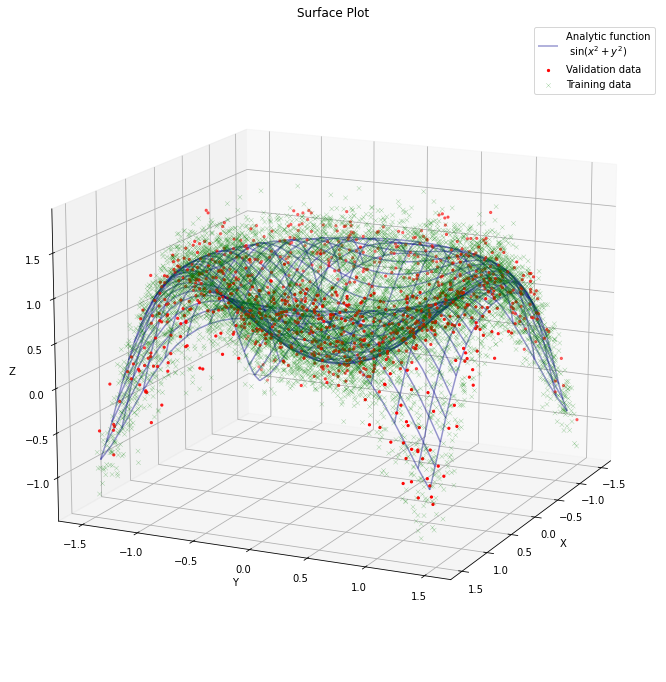

In [10]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

x_ = np.arange(-span,span, 0.1)
y_ = np.arange(-span,span, 0.1)
X_, Y_ = np.meshgrid(x_,y_)
ax.plot_wireframe(  X_, Y_, f(X_,Y_), 
                    rstride=2, label='Analytic function\n $\sin(x^2+y^2)$', color = 'darkblue',
                    alpha =0.4)

ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data')
ax.scatter(x_train, y_train, z_train, marker = "x", color = "green",
               label='Training data', linewidth=0.3, alpha = 0.5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot')
ax.view_init(elev=15, azim=25)  # Adjust the elevation (vertical angle) and azimuth (horizontal angle)

plt.legend()
plt.show()

In questo caso, essendo in presenza di un problema più complesso caratterizzato da uno spazio dei parametri a maggiore dimensionalità, mi è sembrato sensato aumentare la complessità della rete neurale aumentando neuroni e strati. Ho fatto un po' di prove e quattro strati con un buon numero di neuroni nei primi sembra garantire un ottimo fit.

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

act = 'tanh'
model.add(Dense(40, input_shape=(2,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(30, activation = act))
model.add(Dense(20, activation = act))
model.add(Dense(1, activation = act))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])

In [12]:
history = model.fit(x=XY_train, y=z_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(XY_valid, z_valid),verbose=0)

In [13]:
# evaluate model
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
#verbose=1: It controls the verbosity mode. In this case, verbose=1 means that the evaluation 
#progress and results will be displayed during the evaluation.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.040290046483278275
Test accuracy: 0.04059562459588051


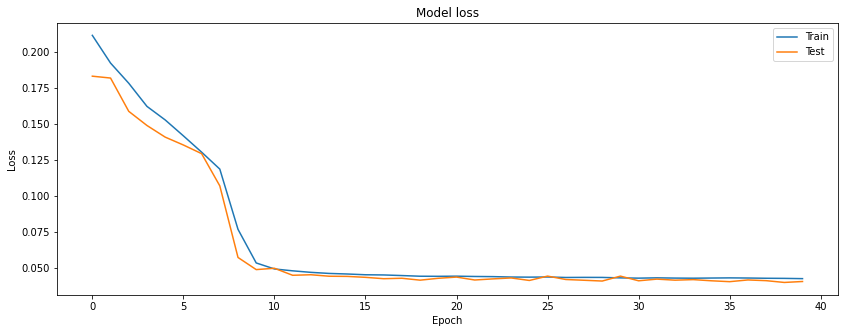

In [14]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

E' possibile notare che per questo problema servono più generazioni perché i pesi e i bias si stabilizzino. Questo comportamento era prevedibile sulla base della maggiore complessità del problema.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


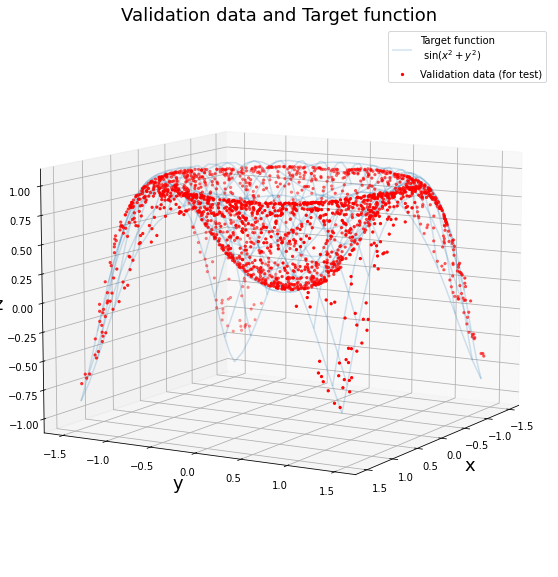

In [18]:
# generate predictions
x_predicted = np.random.uniform(-span, span, 2000) 
y_predicted = np.random.uniform(-span, span, 2000) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
x_ = np.arange(-span,span, 0.1)
y_ = np.arange(-span,span, 0.1)
X_, Y_ = np.meshgrid(x_,y_)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)
ax.plot_wireframe(  X_, Y_, f(X_,Y_), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function", fontsize = 18)
ax.legend()
ax.view_init(10, 30)


plt.show()

E' possibile notare che è stato ottenuto un ottimo fit su tutto il dominio di allenamento. Il maggiore problema che ho riscontrato è stato quello di avere un buon fit sulle code. Ho notato che aumentare gli strati, il numero di neuroni e il numero delle epoche non aveva una grande influenza su questo aspetto. L'unico modo efficace è stato impostare l'ottimizzatore su *nadam* (anche *adam* funzionava abbastanza bene). Probabilmente la difficoltà è da ricercare nella scarsità di dati che descrivono le code rispetto al resto della funzione.